## 2023 HTU Attendee Analysis
This report aims to provide a comprehensive analysis of the attendees of the 2023 HTU event. The analysis is broken down into four main sections: 
- General overview
- Title catorgization
- Regirstration type
- Geographical distribution


### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
current_path = os.getcwd()
print(current_path)


c:\Users\BFO3515\OneDrive - HCA Healthcare\Documents\Holly Hou\Data\Notebooks


In [2]:
# Try different encodings if the first one doesn't work
encodings = ['latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv('HTU_2023_1.csv', encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the file with encoding: {encoding}")
df.columns
# Function to convert column names to kebab-case
def to_kebab_case(col_name):
    return col_name.replace(' ', '_')

# Apply the function to all column names
df.columns = [to_kebab_case(col) for col in df.columns]

Successfully read the file with encoding: latin1


In [3]:
df.head()


,Confirmation_Number,Invitee_Status,Registration_Type,First_Name,Last_Name,Email_Address,Company_Name,Facility_Name,Title,3/4_ID,Division/Outside_Organization,Age_Range,Gender,Primary_Address
0,B5N6ZZC2YTZ,Accepted,Sales Prospects,Marshall,Simpson,marshall.simpson@dominionsmedical.com,Dominions Medical,Dominions Medical,___,NaN,NaN,NaN,NaN,NaN
1,S5N44944XK8,Accepted,Member Full Conference Registration,Jennifer,Russell,JARussell@beaconhealthsystem.org,Beacon Health,Elkhart,340B Coordinator,NaN,NaN,45-54 years old,Female,600 East BLVD
2,5HNVNGNVVQ9,Accepted,Exhibitor Representative,Michael,Sebetka,michael.sebetka@abbott.com,ABBOTT,NaN,ABBOTT,NaN,NaN,35-44 years old,NaN,3351 Pebble Beach Blvd
3,JPNGLJHMPBT,Accepted,Member Full Conference Registration,Debbie,Michel,dmichel@pharmacareservices.com,PharmaCare Services,Corporate,Account Director,NaN,NaN,55-64 years old,Female,713 Fourth Street
4,3PNX3L24VP7,Accepted,Complimentary Representatives,Jill,Clarke,NaN,DEX Imaging,NaN,Account Director,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Confirmation_Number            3171 non-null   object
 1   Invitee_Status                 3171 non-null   object
 2   Registration_Type              3172 non-null   object
 3   First_Name                     3171 non-null   object
 4   Last_Name                      3171 non-null   object
 5   Email_Address                  3113 non-null   object
 6   Company_Name                   3158 non-null   object
 7   Facility_Name                  1573 non-null   object
 8   Title                          3128 non-null   object
 9   3/4_ID                         406 non-null    object
 10  Division/Outside_Organization  454 non-null    object
 11  Age_Range                      3054 non-null   object
 12  Gender                         1479 non-null   object
 13  Pri

In [5]:
df['Gender'].value_counts()

Gender
Female    742
Male      737
Name: count, dtype: int64

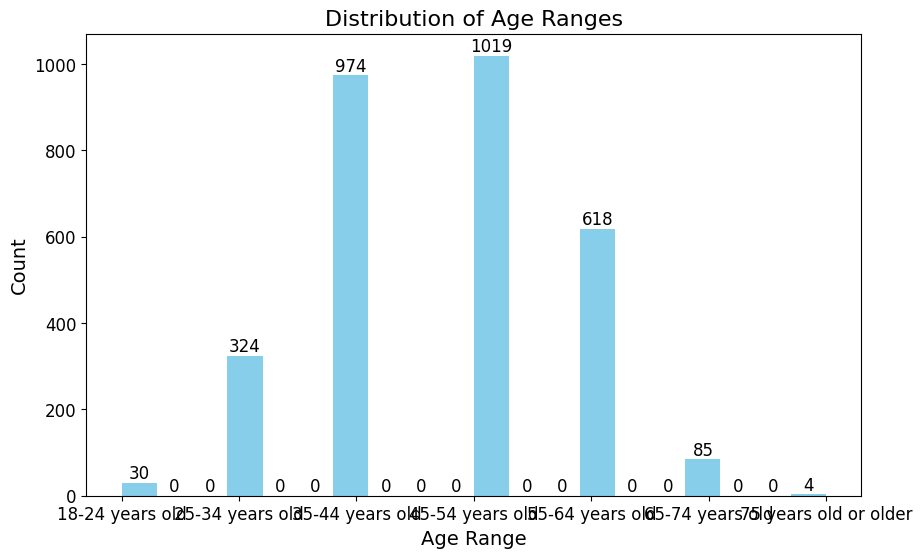

In [6]:
age_sorted = df.sort_values('Age_Range')
age = age_sorted['Age_Range'].dropna()

# Creating the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(age, bins=20, color='skyblue')

# Adding count number labels on top of each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
             patches[i].get_height(), 
             str(int(patches[i].get_height())), 
             ha='center', va='bottom', fontsize=12)

# Adding title and labels
plt.title('Distribution of Age Ranges', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customizing tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Showing the plot
plt.show()

In [7]:
from collections import Counter

# Counting the occurrences of each title
title_counts = Counter(df['Title'])
title_counts

Counter({'Director of Pharmacy': 98,
         'Supply Chain Director': 50,
         nan: 46,
         'Director, National Accounts': 37,
         'Materials Manager': 36,
         'CEO': 30,
         'Clinical Resource Director\xa0': 30,
         'Clinical Resource Director': 28,
         'National Account Manager': 28,
         'Materials Management Director': 26,
         'supply chain director': 23,
         'Director, Materials Management': 23,
         'Director of National Accounts': 22,
         'Sales': 22,
         'President': 20,
         'Strategic Account Manager': 18,
         'National Accounts': 17,
         'Director of Sales': 15,
         'VP': 15,
         'Director, Pharmacy': 14,
         'National Accounts Manager': 14,
         'Director': 13,
         'Director, Corporate Accounts': 13,
         'Industry': 13,
         'VP, National Accounts': 13,
         'Pharmacy Director': 12,
         'Division VP Support Services': 11,
         'chief operation officer':

### Role Catogorization


In [8]:
import pandas as pd
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')

def to_lowercase(text):
    doc = nlp(text)
    return ' '.join([token.text.lower() for token in doc])

# Apply the function to the 'Title' column
df['Title'] = df['Title'].astype(str)
df['Title_Lower'] = df['Title'].apply(to_lowercase)

In [9]:
df['Title_Lower'].isna()
df['Title_Lower'] = df['Title_Lower'].dropna()


### subset df to include only 
•	Member Full Conference  
•	Member Conference Only Pass  
•	Advisory Board Full Conference  
•	Speaker Member  
•	Physician

In [10]:
df['Registration_Type'].value_counts()

Registration_Type
Complimentary Representatives          1252
Member Full Conference Registration     937
HCA Member Full Conference              383
Exhibitor Representative                286
Sponsor                                 134
Advisory Board Full Conference           73
Speaker - Member                         63
Conference-Only Pass                     21
Physician                                14
Sales Prospects                           7
Conference Only Pass Non-Member           1
`                                         1
Name: count, dtype: int64

In [11]:
HCA_df = df[(df['Registration_Type'] == 'HCA Member Full Conference')]
HCA_df.head(2)

,Confirmation_Number,Invitee_Status,Registration_Type,First_Name,Last_Name,Email_Address,Company_Name,Facility_Name,Title,3/4_ID,Division/Outside_Organization,Age_Range,Gender,Primary_Address,Title_Lower
48,DMN6Y6Z2VDS,Accepted,HCA Member Full Conference,Michael,O'Rourke,Michael.Orourke@HCAHealthcare.com,HCA,Capital Division,Clinical Resource Director,KFQ8312,ASD,35-44 years old,Male,202 Minor Circle,clinical resource director
74,FPNYPJV3NVS,Accepted,HCA Member Full Conference,Herbert,Blair,Herbert.BlairIII@HCAHealthcare.com,HCA,Capital Division -ASD Financial Operations,Regional Material Manager,JMU9215,ASD,35-44 years old,Male,One Park Plaza,regional material manager


In [12]:
df_member = df[df['Registration_Type'].isin(['Member Full Conference Registration', 'Advisory Board Full Conference', 'Conference-Only Pass','Speaker - Member','Physician'])]
#df_member = df_member[df_member['Company_Name'] != 'HCA']

In [13]:
top_members = df_member['Company_Name'].value_counts()
top_members

Company_Name
Trinity Health                     68
Surgery Partners                   58
Ovation Healthcare                 52
Steward Health Care System LLC     37
Ardent Health Services             37
                                   ..
Swedish Medical Center              1
Cape Cod Health                     1
Lutheran Health Physicians          1
Western Missouri Medical Center     1
PhyNet Dermatology                  1
Name: count, Length: 236, dtype: int64

<Axes: >

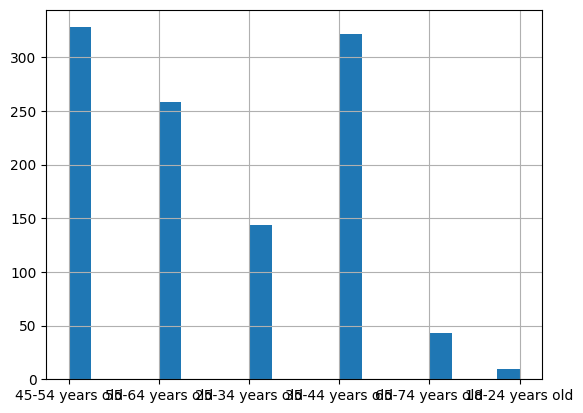

In [14]:
df_member['Age_Range'].hist(bins=20)

In [15]:
df_member['Gender'].value_counts()

Gender
Female    561
Male      532
Name: count, dtype: int64

In [ ]:
titles = df_member['Title_Lower'].dropna()

In [17]:
titles

1                                   340b coordinator
3                                   account director
21                                   account manager
28                                   account manager
33                   admin director community health
                            ...                     
3108                    vp , supply chain operations
3109                    vp , supply chain operations
3110    vp , supply chain ops and gpo implementation
3111                             vp , sustainability
3116                                 vp - operations
Name: Title_Lower, Length: 1108, dtype: object

In [23]:
import pandas as pd

# Assuming your dataframe is called df and the column with titles is 'Title_Lower'
filtered_titles = df_member[df_member['Title_Lower'].str.contains('chief|ceo|chair|president', case=False, na=False)]

# Display the filtered titles
filtered_titles.head(5)


,Confirmation_Number,Invitee_Status,Registration_Type,First_Name,Last_Name,Email_Address,Company_Name,Facility_Name,Title,3/4_ID,Division/Outside_Organization,Age_Range,Gender,Primary_Address,Title_Lower
94,BPNXT9667NQ,Accepted,Member Full Conference Registration,Ann,Aquino,ann_aquino@elcaminohealth.org,El Camino Health,El Camino,Associate Chief Nursing Officer,NaN,NaN,45-54 years old,Female,815 Pollard Road,associate chief nursing officer
219,YNNZRDRBH42,Accepted,Member Full Conference Registration,Paul,Tirjan,Paul.Tirjan@AllSpire.org,Allspire,NaN,CEO,NaN,NaN,55-64 years old,Male,"100 Front Street One Tower Bridge, Suite 1250",ceo
220,MYN4KPCDL38,Accepted,Member Full Conference Registration,Aaron,Saude,asaude@bigforkvalley.org,Bigfork Valley,Big Fork Valley Hospital,CEO,NaN,NaN,45-54 years old,Male,258 Pine Tree Drive,ceo
224,XPNPL3PPVW5,Accepted,Member Full Conference Registration,Jimmy,Lewis,theleadershipgrp@mindspring.com,HomeTown Health,HomeTown Health,CEO,NaN,NaN,65-74 years old,Male,"HomeTown Health, LLC 3280 Cherry Oak Lane, Su...",ceo
238,DWNZBJXWHSD,Accepted,Member Full Conference Registration,John,Fuller,jfuller@pharmacareservices.com,PharmaCare Services,Corporate,CEO,NaN,NaN,65-74 years old,Male,P.O. Box 1240,ceo


In [28]:
filtered_titles.to_csv('./filtered_titles.csv', index=False)


In [16]:
titles = df_member['Title_Lower'].dropna()
# Define title categories
title_categories = {
    'Director': ['director'],
    'VP/AVP/GVP': ['vp'],
    'C-suite': ['chief','president','chair','ceo'],
}

# Initialize counters
title_counts = {category: 0 for category in title_categories}

for title in titles:
    for category, keywords in title_categories.items():
        if any(keyword in title for keyword in keywords):
            title_counts[category] += 1

title_counts

{'Director': 489, 'VP/AVP/GVP': 100, 'C-suite': 58}

In [191]:
titles = df_member['Title_Lower'].dropna()
# Define title categories
title_categories = {
    'Director': ['director', 'regional director', 'sir director', 'sir regional director'],
    'VP/AVP/GVP': ['vp', 'sir vp', 'svp','avp', 'sir avp','gvp'],
    'C-suite': ['chief','president','chair','ceo'],
}

# Initialize counters
title_counts = {category: 0 for category in title_categories}

for title in titles:
    for category, keywords in title_categories.items():
        if any(keyword in title for keyword in keywords):
            title_counts[category] += 1

title_counts


{'Director': 489, 'VP/AVP/GVP': 100, 'C-suite': 58}

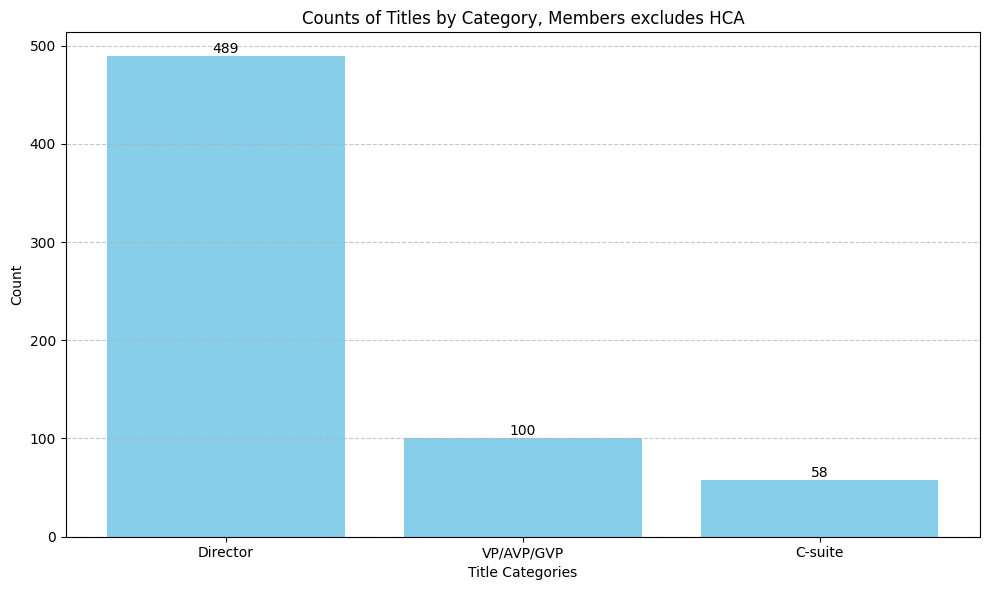

In [192]:
plt.figure(figsize=(10, 6))
bars = plt.bar(title_counts.keys(), title_counts.values(), color='skyblue')

# Adding labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Title Categories')
plt.ylabel('Count')
plt.title('Counts of Titles by Category, Members excludes HCA')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [193]:
# Define segments
segments = {
    'Pharmacy & clinical': ['pharmacy','Pharmacist','clinical'],
    'Supply Chain': ['supply chain', 'materials','material', 'purchasing','logistics' 'sourcing','Procurement'],
    'Finances':['CFO', 'finance','financial'],
    'Physician & nursing':['physician', 'nursing', 'nurse'],
    'Others': []
}

# Initialize segment counters
segment_counts = {segment: {category: 0 for category in title_categories} for segment in segments}

# Categorize titles into segments and count
for title in titles:
    categorized = False
    for segment, keywords in segments.items():
        if any(keyword in title for keyword in keywords):
            for category, category_keywords in title_categories.items():
                if any(keyword in title for keyword in category_keywords):
                    segment_counts[segment][category] += 1
                    categorized = True
    if not categorized:
        for category, category_keywords in title_categories.items():
            if any(keyword in title for keyword in category_keywords):
                segment_counts['Others'][category] += 1

segment_counts

{'Pharmacy & clinical': {'Director': 179, 'VP/AVP/GVP': 17, 'C-suite': 10},
 'Supply Chain': {'Director': 181, 'VP/AVP/GVP': 32, 'C-suite': 7},
 'Finances': {'Director': 4, 'VP/AVP/GVP': 3, 'C-suite': 6},
 'Physician & nursing': {'Director': 7, 'VP/AVP/GVP': 5, 'C-suite': 7},
 'Others': {'Director': 127, 'VP/AVP/GVP': 45, 'C-suite': 28}}

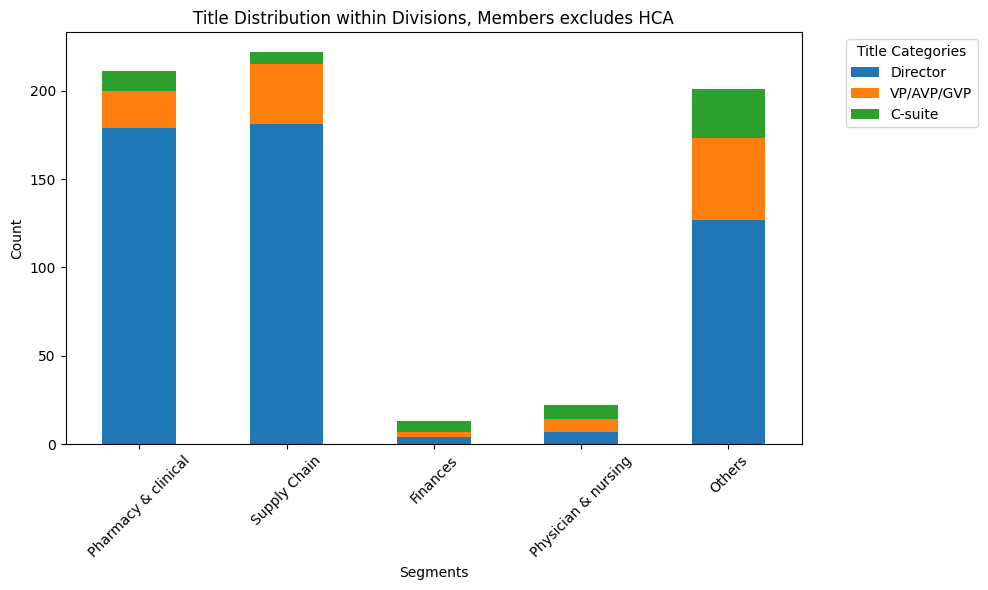

In [134]:
# Convert the filtered dictionary to a DataFrame
segment_df = pd.DataFrame(segment_counts).fillna(0)

# Transpose the DataFrame to get segments as rows and categories as columns
segment_df = segment_df.T

# Plot the data
ax = segment_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Title Distribution within Divisions, Members excludes HCA')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Title Categories', bbox_to_anchor=(1.05, 1), loc='upper left')



# Show the plot
plt.tight_layout()
plt.show()

In [135]:
titles = HCA_df['Title_Lower'].dropna()
# Define title categories
title_categories = {
    'Director': ['director', 'regional director', 'sir director', 'sir regional director'],
    'VP/AVP/GVP': ['vp', 'sir vp', 'svp','avp', 'sir avp','gvp'],
    'C-suite': ['chief','president','chair','ceo'],
}

# Initialize counters
title_counts = {category: 0 for category in title_categories}

# Count titles
for title in titles:
    for category, keywords in title_categories.items():
        if any(keyword in title for keyword in keywords):
            title_counts[category] += 1

title_counts

title_counts


{'Director': 271, 'VP/AVP/GVP': 36, 'C-suite': 32}

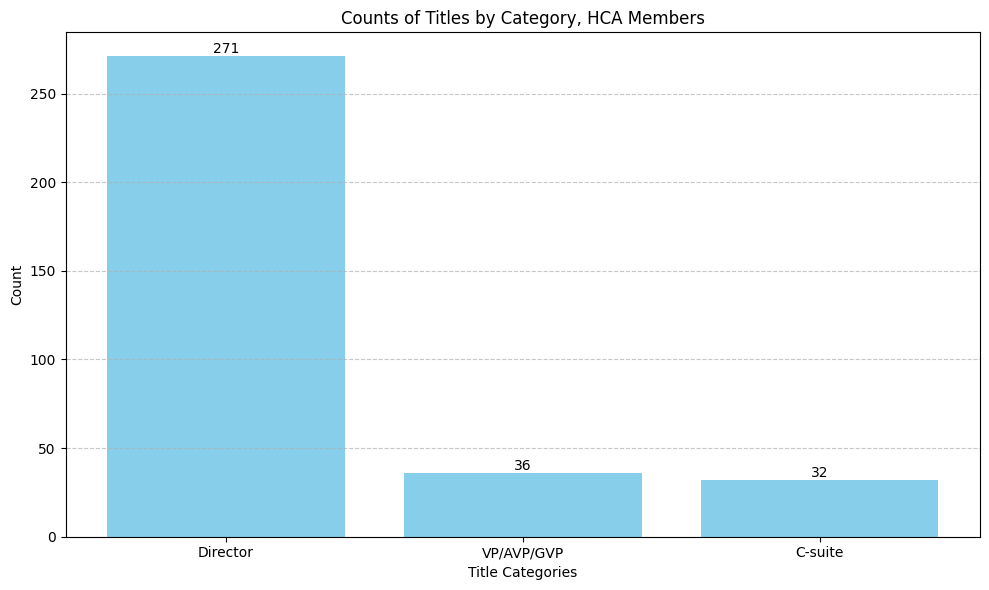

In [136]:
plt.figure(figsize=(10, 6))
bars = plt.bar(title_counts.keys(), title_counts.values(), color='skyblue')

# Adding labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Title Categories')
plt.ylabel('Count')
plt.title('Counts of Titles by Category, HCA Members')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [137]:
# Define segments
segments = {
    'Pharmacy & clinical': ['pharmacy','Pharmacist','clinical'],
    'Supply Chain': ['supply chain', 'materials','material', 'purchasing','logitics' 'sourcing','Procurement'],
    'Finances':['CFO', 'finance','financial'],
    'Physician & nursing':['physician', 'nursing', 'nurse'],
    'Others': []
}

# Initialize segment counters
segment_counts_HCA = {segment: {category: 0 for category in title_categories} for segment in segments}

# Categorize titles into segments and count
for title in titles:
    categorized = False
    for segment, keywords in segments.items():
        if any(keyword in title for keyword in keywords):
            for category, category_keywords in title_categories.items():
                if any(keyword in title for keyword in category_keywords):
                    segment_counts_HCA[segment][category] += 1
                    categorized = True
    if not categorized:
        for category, category_keywords in title_categories.items():
            if any(keyword in title for keyword in category_keywords):
                segment_counts_HCA['Others'][category] += 1

# Remove categories with zero counts
filtered_segment_counts_HCA = {segment: {cat: count for cat, count in counts.items() if count > 0} 
                               for segment, counts in segment_counts_HCA.items() if any(count > 0 for count in counts.values())}


filtered_segment_counts_HCA

{'Pharmacy & clinical': {'Director': 129, 'VP/AVP/GVP': 11},
 'Supply Chain': {'Director': 95, 'VP/AVP/GVP': 2, 'C-suite': 6},
 'Finances': {'Director': 3, 'VP/AVP/GVP': 2, 'C-suite': 8},
 'Others': {'Director': 44, 'VP/AVP/GVP': 22, 'C-suite': 18}}

C:\Users\BFO3515\AppData\Local\Temp\ipykernel_9540\618152761.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = segment_df.iloc[i].cumsum()[j]
C:\Users\BFO3515\AppData\Local\Temp\ipykernel_9540\618152761.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_shift = segment_df.iloc[i].cumsum().shift(1).fillna(0)[j]


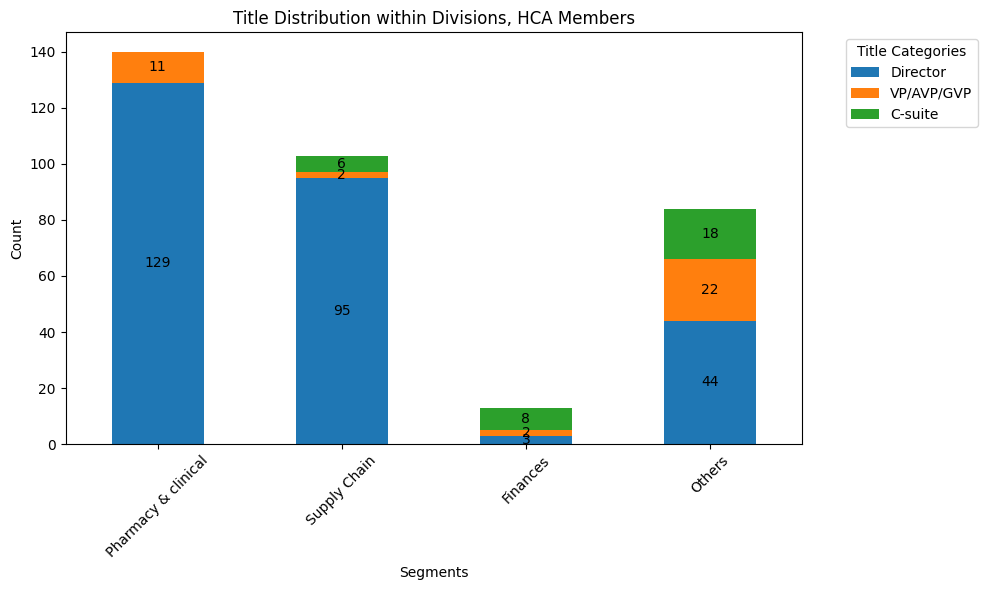

In [138]:
# Convert the filtered dictionary to a DataFrame
segment_df = pd.DataFrame(filtered_segment_counts_HCA).fillna(0)

# Transpose the DataFrame to get segments as rows and categories as columns
segment_df = segment_df.T

# Plot the data
ax = segment_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Title Distribution within Divisions, HCA Members')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Title Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to each bar
for i in range(segment_df.shape[0]):
    for j in range(segment_df.shape[1]):
        y = segment_df.iloc[i].cumsum()[j]
        y_shift = segment_df.iloc[i].cumsum().shift(1).fillna(0)[j]
        if segment_df.iloc[i, j] > 0:  # Only add label if the count is greater than 0
            plt.text(i, y - (y - y_shift) / 2, f"{int(segment_df.iloc[i, j])}", ha='center', va='center')

# Show the plot
plt.tight_layout()
plt.show()


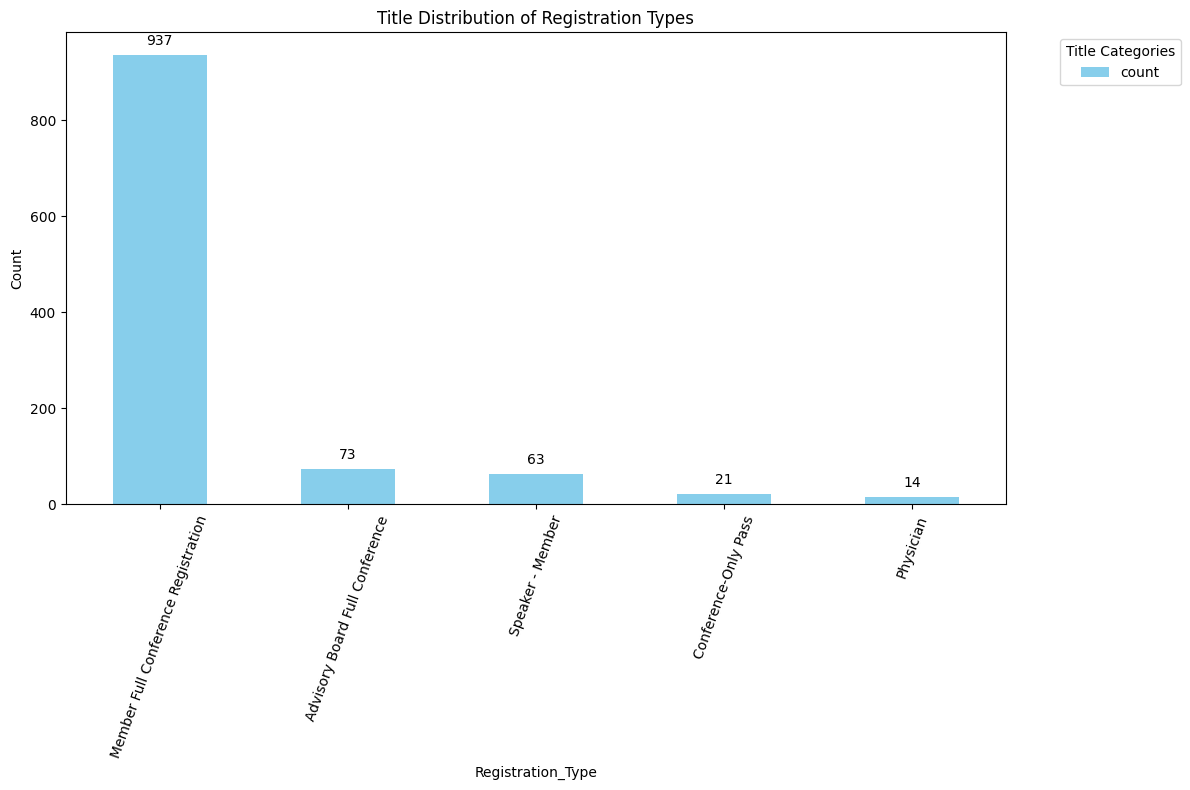

In [139]:
regist_count = pd.DataFrame(df_member['Registration_Type'].value_counts())

ax = regist_count.plot(kind='bar', figsize=(12, 8), color = 'skyblue')


# Add titles and labels
plt.title('Title Distribution of Registration Types')
plt.ylabel('Count')
plt.legend(title='Title Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=70)

# Add number labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

### Geographical analysis

In [22]:
import geopandas as gpd
import pandas as pd
import folium
from geopy.geocoders import Nominatim

In [23]:
df_geo = pd.read_csv('HTU_2023_add.csv')

# Ensure zip codes are strings
df_geo['work_zip'] = df_geo['work_zip'].astype(str)
df_geo.columns

Index(['Registration Type', 'Work Address', 'Work_city', 'Work_state',
       'work_zip'],
      dtype='object')

In [24]:
# Group by state and count zip codes
state_counts = df_geo.groupby(['Work_state']).size().reset_index(name='count')
state_counts = state_counts.sort_values(by='count', ascending=False)
state_counts


,Work_state,count
42,Texas,294
41,Tennessee,258
9,Florida,135
4,California,133
37,Pennsylvania,102
20,Massachusetts,66
29,New Jersey,63
21,Michigan,61
12,Illinois,60
32,North Carolina,56


In [25]:

# Creating the DataFrame with the provided data
data = {
    'Work_state': ['Texas', 'Tennessee', 'Florida', 'California', 'Pennsylvania', 'Massachusetts', 'New Jersey', 'Michigan', 
                   'Illinois', 'North Carolina', 'Indiana', 'Nevada', 'Ohio', 'Virginia', 'Missouri', 'New York', 
                   'Louisiana', 'Georgia', 'Idaho', 'Colorado', 'Kansas', 'Utah', 'Alabama', 'Minnesota', 'Kentucky', 
                   'South Carolina', 'Oklahoma', 'Arizona', 'Wisconsin', 'New Mexico', 'Mississippi', 'Iowa', 'Maryland', 
                   'Washington', 'Arkansas', 'New Hampshire', 'Nebraska', 'Oregon', 'Connecticut', 'Delaware', 
                   'Maine', 'Vermont', 'Montana', 'Alaska', 'South Dakota', 'West Virginia', 
                   'District of Columbia', 'Wyoming'],
    'count': [293, 258, 135, 133, 102, 66, 63, 61, 60, 56, 54, 52, 50, 47, 43, 41, 40, 37, 37, 35, 32, 31, 26, 25, 21, 19, 17, 15, 
              15, 14, 12, 11, 9, 8, 7, 7, 7, 6, 5, 4, 4, 3, 3, 3, 2, 1, 1, 1]
}
state_counts = pd.DataFrame(data)

state_codes = {
    'Texas': 'TX', 'Tennessee': 'TN', 'Florida': 'FL', 'California': 'CA', 'Pennsylvania': 'PA', 'Massachusetts': 'MA', 
    'New Jersey': 'NJ', 'Michigan': 'MI', 'Illinois': 'IL', 'North Carolina': 'NC', 'Indiana': 'IN', 'Nevada': 'NV', 
    'Ohio': 'OH', 'Virginia': 'VA', 'Missouri': 'MO', 'New York': 'NY', 'Louisiana': 'LA', 'Georgia': 'GA', 'Idaho': 'ID', 
    'Colorado': 'CO', 'Kansas': 'KS', 'Utah': 'UT', 'Alabama': 'AL', 'Minnesota': 'MN', 'Kentucky': 'KY', 'South Carolina': 'SC', 
    'Oklahoma': 'OK', 'Arizona': 'AZ', 'Wisconsin': 'WI', 'New Mexico': 'NM', 'Mississippi': 'MS', 'Iowa': 'IA', 'Maryland': 'MD', 
    'Washington': 'WA', 'Arkansas': 'AR', 'New Hampshire': 'NH', 'Nebraska': 'NE', 'Oregon': 'OR', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'Maine': 'ME', 'Vermont': 'VT', 'Montana': 'MT', 'Alaska': 'AK', 'South Dakota': 'SD','West Virginia': 'WV', 'District of Columbia': 'DC', 'Wyoming': 'WY'
}

state_counts['state_code'] = state_counts['Work_state'].map(state_codes)


In [26]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

df_state = pd.DataFrame(state_counts)


# Create a choropleth map
fig = px.choropleth(df_state,
                    locations='state_code',
                    locationmode="USA-states",
                    color='count',
                    hover_name='Work_state',
                    color_continuous_scale='reds',
                    scope="usa",
                    labels={'count': 'Count'})

fig.update_layout(title_text='Work State Counts, Member')
# Save the plot as a static image (e.g., PNG)
#pio.write_image(fig, 'work_state_counts.png', format='png')

# Save the plot as an HTML file
pio.write_html(fig, 'work_state_counts.html')
fig.show()


In [27]:
pd.set_option('display.max_rows', None)
print(df['Company_Name'].value_counts())

Company_Name
Health Trust                                                            289
HCA                                                                      92
Trinity Health                                                           70
Surgery Partners                                                         58
Ovation Healthcare                                                       52
Ardent Health Services                                                   37
Steward Health Care System LLC                                           37
Lifepoint Health                                                         35
Community Hospital Corporation - Supply Trust                            34
LifePoint Health                                                         34
CHS                                                                      34
Cardinal Health                                                          34
Prime Healthcare                                                         30

In [140]:
company_count = df['Company_Name'].value_counts()
company_df = pd.DataFrame(company_count)
company_df.head(30)

,count
Company_Name,
Health Trust,289
HCA,98
Trinity Health,70
Surgery Partners,58
Ovation Healthcare,52
Steward Health Care System LLC,37
Ardent Health Services,37
Lifepoint Health,35
LifePoint Health,34


## HCA Attendee Analysis


In [141]:
HCA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 48 to 3127
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Confirmation_Number            383 non-null    object
 1   Invitee_Status                 383 non-null    object
 2   Registration_Type              383 non-null    object
 3   First_Name                     383 non-null    object
 4   Last_Name                      383 non-null    object
 5   Email_Address                  383 non-null    object
 6   Company_Name                   383 non-null    object
 7   Facility_Name                  383 non-null    object
 8   Title                          383 non-null    object
 9   3/4_ID                         383 non-null    object
 10  Division/Outside_Organization  383 non-null    object
 11  Age_Range                      383 non-null    object
 12  Gender                         378 non-null    object
 13  Primary_

In [142]:
HCA_df['Gender'].value_counts()

Gender
Male      199
Female    179
Name: count, dtype: int64

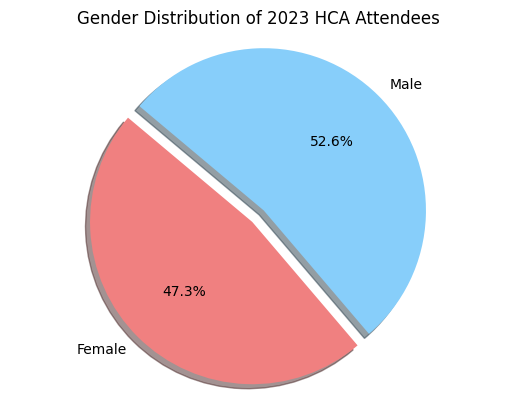

In [143]:
# Data for the pie chart
labels = ['Female', 'Male']
sizes = [47.35, 52.65]  # Proportions of each category
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # "explode" the 1st slice (i.e., 'Category A')

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution of 2023 HTU Attendees')
plt.axis('equal')

# Display the chart
plt.show()

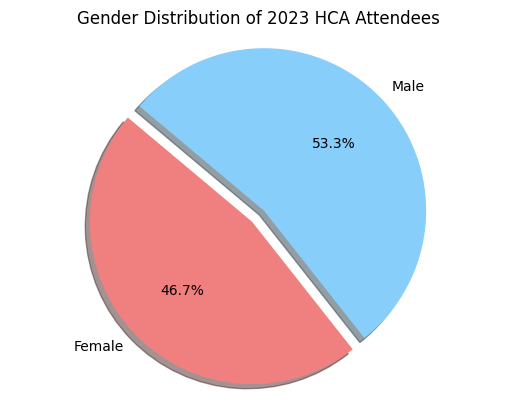

In [144]:
# Data for the pie chart
labels = ['Female', 'Male']
sizes = [46.74, 53.26]  # Proportions of each category
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # "explode" the 1st slice (i.e., 'Category A')

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution of 2023 HCA Attendees')
plt.axis('equal')

# Display the chart
plt.show()


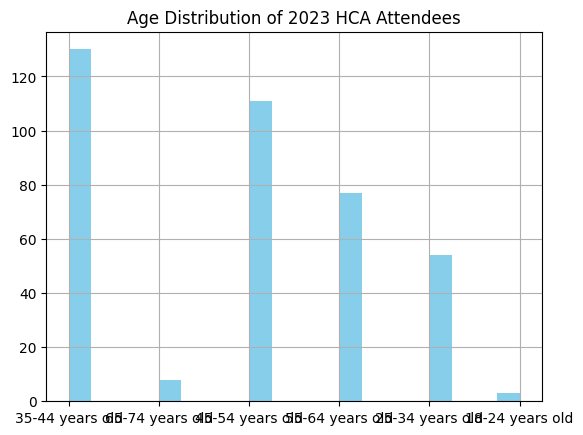

In [145]:
HCA_df['Age_Range'].hist(bins = 20, color = 'skyblue')
plt.title('Age Distribution of 2023 HCA Attendees')
plt.show()

C:\Users\BFO3515\AppData\Local\Temp\ipykernel_9540\3513755873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HCA_df['Age_Range'] = pd.Categorical(HCA_df['Age_Range'], categories=age_order, ordered=True)


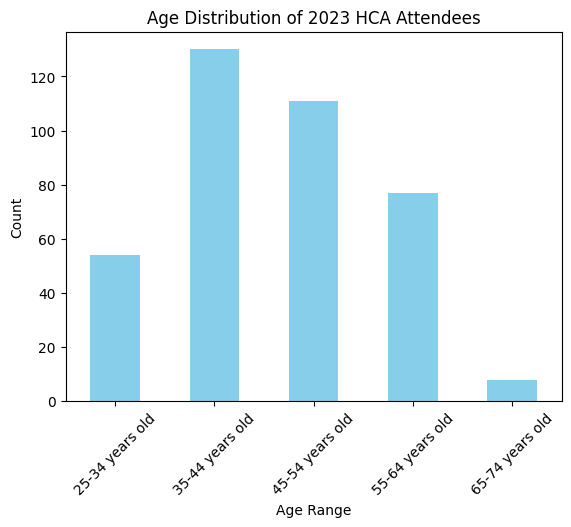

In [146]:
# Define the order of age ranges
age_order = ['25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65-74 years old']


# Assuming HCA_df is your DataFrame and it contains the 'Age_Range' column
# First, get the counts for each age range
age_count = HCA_df['Age_Range'].value_counts().reindex(age_order)


# Convert 'Age_Range' to categorical with the defined order
HCA_df['Age_Range'] = pd.Categorical(HCA_df['Age_Range'], categories=age_order, ordered=True)

# Sort the DataFrame by 'Age_Range'
HCA_df = HCA_df.sort_values('Age_Range')

# Get the sorted counts
sorted_age_count = age_count.reindex(age_order)

# Plot the sorted data
sorted_age_count.plot(kind='bar', color='skyblue')
plt.title('Age Distribution of 2023 HCA Attendees')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [147]:
age_count =HCA_df['Age_Range'].value_counts()

In [148]:
HCA_df['Registration_Type'].value_counts()

Registration_Type
HCA Member Full Conference    383
Name: count, dtype: int64

In [151]:
facility_count = HCA_df['Facility_Name'].value_counts()
facility = pd.DataFrame(facility_count)
facility.head(10)

,count
Facility_Name,
Corporate,37
Gulf Coast Supply Chain,17
East Florida Supply Chain,14
San Antonio Supply Chain,13
Capital Supply Chain,13
TriStar Supply Chain,11
North Texas Supply Chain,10
Mountain Supply Chain,10
Continental Supply Chain,9


In [150]:
Division_count = HCA_df['Division/Outside_Organization'].value_counts()
Division = pd.DataFrame(Division_count)
Division.head(10)

,count
Division/Outside_Organization,
Gulf Coast,34
Corporate,33
Capital,31
TriStar,29
North Texas,28
North Florida,24
East Florida,24
Mountain,23
ASD,20
